In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import math
import copy

In [2]:
def generateTargetZeroX(n):
    xList = []
    for x in range(n):
        x1 = np.random.uniform(-.5, .5)
        x2 = np.random.uniform(-.5, .5)
        xList.append([x1, x2])
    return xList

def generateTargetZeroT(n):
    tList = []
    for t in range(n):
        tList.append(-1)
    return tList

def generateTargetOneX(n):
    xList = []
    rList = np.random.uniform(3.0, 4, n)
    for r in rList:
        theta = np.random.uniform(0.0,1) * 2 * math.pi
        x1 = r * np.cos(theta)
        x2 = r * np.sin(theta)
        xList.append([x1, x2])
    return xList

def generateTargetOneT(n):
    tList = []
    for t in range(n):
        tList.append(1)
    return tList

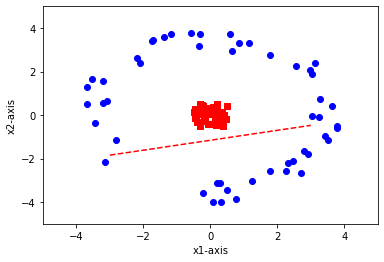

In [3]:
n = int(100)

targetZeroX = generateTargetZeroX(int(n/2))
targetOneX = generateTargetOneX(int(n/2))
targetZeroT = generateTargetZeroT(int(n/2))
targetOneT = generateTargetOneT(int(n/2))

x = targetZeroX + targetOneX

#  expected output
t = targetZeroT +  targetOneT

# Generating random weights 
w1 = random.uniform(-2.0,2)
w2 = random.uniform(-2.0,2)
# bias 
w3 = random.uniform(-2.0,2)

#Learning rate
lr = 0.1

output = []

flag = False
count = 1
k = np.linspace(-3,3,num= 5)

plt.xlabel("x1-axis")
plt.ylabel("x2-axis")
plt.axis([-5,5,-5,5])

for i in range(0,n):
    if t[i]>0:
        # print(str(t[i]) + ": " + str(x[i]))
        # mark output one using a blue circle
        plt.scatter(x[i][0],x[i][1],marker="o",c="b")
    else:
        # print(str(t[i]) + ": " + str(x[i]))
        # mark output zero using a red square
        plt.scatter(x[i][0],x[i][1],marker="s",c="r")

l = -((w3+(k*w1))/w2)
plt.plot(k,l,linestyle='--',c='r')

plt.show()

Total training steps:  9999
Target = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Actual Output y = [1.6979741835883868e-05, 2.244969144876463e-05, 1.6795786669731487e-05, 2.100625229756997e-05, 1.9098950878317917e-05, 2.7294165900907927e-05, 1.7054946427013477e-05, 2.4070853261208117e-05, 3.1227338214988186e-05, 2.6649437645201053e-05, 2.4720792251048616e-05, 1.7855889387086064e-05, 1.764817141760423e-05, 1.97573497372174e-05, 1.7527360396757952e-05, 1.694539714821673e-05, 2.130514089928593e-05, 3.7549258033901974e-05, 1.9141814351637842e-05, 1.719383410273247e-05, 1.623783981863819e-05, 2.2503757477951356e-05, 1.9743515224037815e-05, 1.5796417788428794e-05, 1.579444522990638e-05, 2.2

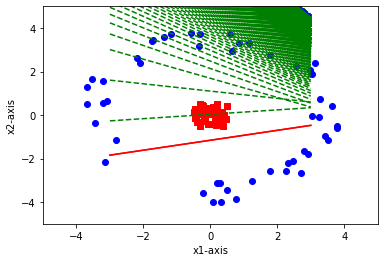

In [4]:
l = -((w3+(k*w1))/w2)
while count < 10000:
    output = []
    for i in range(0,n):
        
        u = (x[i][0]*w1)**2 + (x[i][1]*w2)**2 + w3
        
        y = 1.0/( 1 + np.exp(-u))

        dw1 = lr*(2*x[i][0]*(t[i]-y))*(y*(1-y))
        dw2 = lr*(2*x[i][1]*(t[i]-y))*(y*(1-y))
        dw3 = lr*(t[i]-y)*(y*(1-y))

        w1 = w1 + dw1
        w2 = w2 + dw2
        w3 = w3 + dw3

        output.insert(i,y)

        
    l = -((w3+(k*w1))/w2)        
    
    count = count + 1 

print("Total training steps: ", count-1)
print ("Target =", t)
print ("Actual Output y =", output)
